In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
from google.colab import files
from keras_preprocessing import image
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras import Model
# from tensorflow.keras.applications.xception import preprocess_input
# from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [3]:
# print("Farrel")
# farrel_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/1-farrel/traditional/'
# farrel_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/1-farrel/modern/'
# print('Traditional Batik:', len(os.listdir(farrel_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(farrel_modern_source_dir)))

# print("\nDosen")
# dosen_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/2-dosen/traditional/'
# dosen_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/2-dosen/modern/'
# print('Traditional Batik:', len(os.listdir(dosen_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(dosen_modern_source_dir)))

# print("\nAnggun")
# anggun_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/3-anggun/traditional/'
# anggun_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/3-anggun/modern/'
# print('Traditional Batik:', len(os.listdir(anggun_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(anggun_modern_source_dir)))

# print("\nRiqqah")
# riqqah_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/4-riqqah/traditional/'
# riqqah_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/4-riqqah/modern/'
# print('Traditional Batik:', len(os.listdir(riqqah_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(riqqah_modern_source_dir)))

In [4]:
# def copy_data(SOURCE, DESTINATION):
#   file_names = os.listdir(SOURCE)

#   for index, file in enumerate(file_names):
#     copyfile(os.path.join(SOURCE, file), os.path.join(DESTINATION, file))

# gdrive_traditional_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all-v2/traditional/'
# gdrive_modern_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all-v2/modern/'

# copy_data(farrel_traditional_source_dir, gdrive_traditional_dir)
# copy_data(farrel_modern_source_dir, gdrive_modern_dir)

# copy_data(dosen_traditional_source_dir, gdrive_traditional_dir)
# copy_data(dosen_modern_source_dir, gdrive_modern_dir)

# copy_data(riqqah_traditional_source_dir, gdrive_traditional_dir)
# copy_data(riqqah_modern_source_dir, gdrive_modern_dir)

In [5]:
# print("All")
# # 10
# # 3
# all_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all/traditional/'
# all_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all/modern/'
# print('Traditional Batik:', len(os.listdir(all_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(all_modern_source_dir)))

# print("All except 2")
# # 11
# # 4
# all_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_2/traditional/'
# all_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_2/modern/'
# print('Traditional Batik:', len(os.listdir(all_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(all_modern_source_dir)))

print("All except 3")
# 10
# 3
all_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_3/traditional/'
all_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_3/modern/'
print('Traditional Batik:', len(os.listdir(all_traditional_source_dir)))
print('Modern Batik:', len(os.listdir(all_modern_source_dir)))
# # print(os.listdir(all_modern_source_dir))

All except 3
Traditional Batik: 310
Modern Batik: 256


In [6]:
try:
    os.mkdir('/tmp/batik-technique')
    os.mkdir(os.path.join('/tmp/batik-technique/', 'training'))
    os.mkdir(os.path.join('/tmp/batik-technique/', 'validation'))
    os.mkdir(os.path.join('/tmp/batik-technique/', 'testing'))
    os.mkdir(os.path.join('/tmp/batik-technique/training/', 'traditional'))
    os.mkdir(os.path.join('/tmp/batik-technique/training/', 'modern'))
    os.mkdir(os.path.join('/tmp/batik-technique/validation/', 'traditional'))
    os.mkdir(os.path.join('/tmp/batik-technique/validation/', 'modern'))
    os.mkdir(os.path.join('/tmp/batik-technique/testing/', 'traditional'))
    os.mkdir(os.path.join('/tmp/batik-technique/testing/', 'modern'))
except OSError:
    pass

In [7]:
training_dir = '/tmp/batik-technique/training/'
training_traditional_dir = '/tmp/batik-technique/training/traditional/'
training_modern_dir = '/tmp/batik-technique/training/modern/'

validation_dir = '/tmp/batik-technique/validation/'
validation_traditional_dir = '/tmp/batik-technique/validation/traditional/'
validation_modern_dir = '/tmp/batik-technique/validation/modern/'

testing_dir = '/tmp/batik-technique/testing/'
testing_traditional_dir = '/tmp/batik-technique/testing/traditional/'
testing_modern_dir = '/tmp/batik-technique/testing/modern/'

In [8]:
def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE):
  if not os.path.exists(TRAINING): 
    os.makedirs(TRAINING) 

  if not os.path.exists(VALIDATION): 
    os.makedirs(VALIDATION)

  if not os.path.exists(TESTING): 
    os.makedirs(TESTING) 

  file_names = os.listdir(SOURCE)

  random_set = random.sample(file_names, len(file_names))
  random_set_length = len(random_set)

  for index, data in enumerate(random_set):
    if index < SPLIT_SIZE * random_set_length:
      if index < 0.8 * random_set_length:
        copyfile(os.path.join(SOURCE, data), os.path.join(TRAINING, data))
      else:
        copyfile(os.path.join(SOURCE, data), os.path.join(VALIDATION, data))
    else: 
      copyfile(os.path.join(SOURCE, data), os.path.join(TESTING, data))

In [9]:
split_size = .9
split_data(all_traditional_source_dir, training_traditional_dir, validation_traditional_dir, testing_traditional_dir, split_size)
split_data(all_modern_source_dir, training_modern_dir, validation_modern_dir, testing_modern_dir, split_size)

In [10]:
print("Training Data")
print("traditional :", len(os.listdir(training_traditional_dir)))
print("modern :", len(os.listdir(training_modern_dir)))

print("\nValidation Data")
print("traditional :", len(os.listdir(validation_traditional_dir)))
print("modern :", len(os.listdir(validation_modern_dir)))

print("\nTesting Data")
print("traditional :", len(os.listdir(testing_traditional_dir)))
print("modern :", len(os.listdir(testing_modern_dir)))

Training Data
traditional : 248
modern : 205

Validation Data
traditional : 31
modern : 26

Testing Data
traditional : 31
modern : 25


In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size=11,
    class_mode = 'categorical',
    target_size = (300, 300),
    shuffle=True
)



validation_datagen = ImageDataGenerator(
    rescale = 1/255
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=4,
    class_mode = 'categorical',
    target_size = (300, 300),
    shuffle=True
)

Found 453 images belonging to 2 classes.
Found 57 images belonging to 2 classes.


In [12]:
base_model = MobileNet(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(300, 300, 3),
    include_top=False
  )

base_model.trainable = False
# for layer in base_model.layers:
#   layer.trainable = False

base_model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 150, 150, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 150, 150, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 150, 150, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 150, 150, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 150, 150, 32)      128       
_________________________________________________

In [13]:
# last_output = base_model.output.shape
# print("Last Output :", last_output)

# x = Flatten()(last_output)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.2)(x)
# output = Dense(1, activation='sigmoid')(x)


inputs = tf.keras.Input(shape=(300, 300, 3))

x = base_model(inputs, training=False)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
# outputs = Dense(1, activation='sigmoid')(x)
outputs = Dense(2, activation='softmax')(x)

In [14]:
model = Model(inputs, outputs)

model.summary()

# model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 9, 9, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              84935680  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 88,166,594
Trainable params: 84,937,730
Non-trainable params: 3,228,864
_________________________________________

In [15]:
history = model.fit(train_generator,
                    epochs=25,
                    validation_data=validation_generator,
                    verbose = 1)

Epoch 1/25
42/42 [==============================] - 162s 4s/step - loss: 3.8741 - acc: 0.6711 - val_loss: 1.5534 - val_acc: 0.5965
Epoch 2/25
42/42 [==============================] - 150s 4s/step - loss: 0.9656 - acc: 0.7991 - val_loss: 0.5253 - val_acc: 0.8772
Epoch 3/25
42/42 [==============================] - 147s 3s/step - loss: 0.7522 - acc: 0.8389 - val_loss: 0.7669 - val_acc: 0.7193
Epoch 4/25
42/42 [==============================] - 148s 4s/step - loss: 0.6263 - acc: 0.8499 - val_loss: 0.5562 - val_acc: 0.8947
Epoch 5/25
42/42 [==============================] - 148s 3s/step - loss: 0.4953 - acc: 0.8852 - val_loss: 0.5391 - val_acc: 0.8246
Epoch 6/25
42/42 [==============================] - 149s 4s/step - loss: 0.5334 - acc: 0.9095 - val_loss: 0.4379 - val_acc: 0.8947
Epoch 7/25
42/42 [==============================] - 149s 4s/step - loss: 0.5551 - acc: 0.8830 - val_loss: 0.2837 - val_acc: 0.8596
Epoch 8/25
42/42 [==============================] - 149s 4s/step - loss: 0.2294 - a

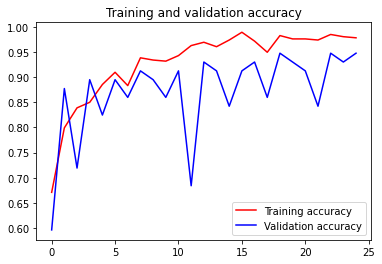

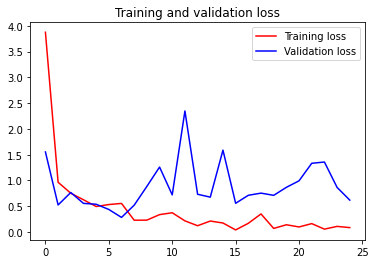

In [16]:
#----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot  ( epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
# plt.title('Training accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot  ( epochs, val_loss, 'b', label='Validation loss')
plt.title ('Training and validation loss')
# plt.title('Training loss')
plt.legend()

plt.show()

In [22]:
labels = train_generator.class_indices.keys()
# print(labels)

count_modern = 0
count_traditional = 0
def test_model(source_path, test_set):
  test_set_length = len(test_set)
  count_modern = 0
  count_traditional = 0
  for file_name in test_set:
    img_path = source_path + file_name
    # print(img_path)
    img = image.load_img(img_path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    result = model.predict(images)[0]
    # print(result[0])
    if result[0] * 100 > 50:
      count_modern += 1
    else:
      count_traditional += 1

    plt.imshow(img)
    plt.show()
    
    print(file_name)
    for (label, percentage) in zip(labels, result):
      print("{}: {:.2f}%".format(label, percentage*100))

  print("test_set_length =", test_set_length)
  print("count_modern =", count_modern)
  print("count_traditional =", count_traditional)

modern_batik_path = '/tmp/batik-technique/testing/modern/'
traditional_batik_path = '/tmp/batik-technique/testing/traditional/'
modern_batik_set = os.listdir(modern_batik_path)
traditional_batik_set = os.listdir(traditional_batik_path)

# test_model(modern_batik_path, modern_batik_set)
test_model(traditional_batik_path, traditional_batik_set)

Output hidden; open in https://colab.research.google.com to view.

In [19]:
# labels = train_generator.class_indices.keys()

# uploaded = files.upload()

# for file_name in uploaded.keys():
 
#   # predicting images
#   path = file_name
#   img = image.load_img(path, target_size=(300, 300))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)
#   x = preprocess_input(x)

#   images = np.vstack([x])
#   proba = model.predict(images)[0]
#   plt.imshow(img)
#   plt.show()
#   for (label, p) in zip(labels, proba):
#     print("{}: {:.2f}%".format(label, p * 100))

In [20]:
# gdrive_saved_model_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all/batik_technique_classification_model.h5"
gdrive_saved_model_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_3/batik_technique_classification_mobilenet_model.h5"

saved_model_path = "/tmp/saved_model/batik_technique_classification_mobilenet_model.h5"

model.save(saved_model_path)

In [21]:
copyfile(saved_model_path, gdrive_saved_model_path

'/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_3/batik_technique_classification_mobilenet_model.h5'

In [27]:
# modern_test_data_source_path = "/tmp/batik-technique/testing/modern/"
# modern_test_data_destination_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_3/test1/modern/"

traditional_test_data_source_path = "/tmp/batik-technique/testing/traditional/"
traditional_test_data_destination_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_3/test1/traditional/"

def copy_data(SOURCE, DESTINATION):
  file_names = os.listdir(SOURCE)

  for index, file in enumerate(file_names):
    copyfile(os.path.join(SOURCE, file), os.path.join(DESTINATION, file))

# print(os.listdir(modern_test_data_source_path))

# copy_data(modern_test_data_source_path, modern_test_data_destination_path)
copy_data(traditional_test_data_source_path, traditional_test_data_destination_path)